# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods

### Goal
The use of first- and second-order methods (Gradient Descent, Non-linear
Conjugate Gradient Descent, Newton’s method and Levenberg-Marquardt
algorithm) in the tasks of unconstrained nonlinear optimization

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

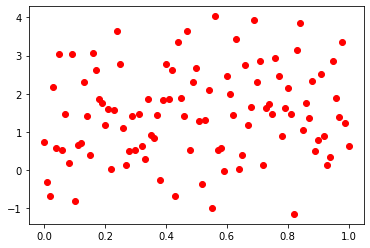

In [35]:
# Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1)
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Noisy data generation
xk = np.array([k / 100 for k in range(101)])
yk = np.array([alpha * k + beta + np.random.normal(0.5, 1.125) for k in xk])

plt.scatter(xk, yk, c='r')

Gradient descent method of optimization

In [38]:
# create gradient descent function
def gradient_descent(xk, yk, w, b, lr, func_type):
    # initialize variable
    d1dw = 0.0
    d1db = 0.0
    N= xk.shape[0]
    
    # loss linear = (wx + b - y) ** 2
    # loss rational = (b / (1 + wx) - y) ** 2
    for xi, yi in zip(xk, yk):
        # gradient step
        if func_type == 'linear':
            d1dw += 2 * (w * xi + b - yi) * xi
            d1db += 2 * (w * xi + b - yi)
        else:
            d1dw += 2 * (w / (1 + b * xi) - yi) / (1 + b * xi)
            d1db += 2 * (w / (1 + b * xi) - yi) * (- xi * w / (1 + b * xi) ** 2)
    
    # make an updates to the parameters
    w = w - lr * (1 / N) * d1dw
    b = b - lr * (1 / N) * d1db
    return w, b

In [40]:
# train function
def train(xk, yk, num_epoch, lr, func_type):  
    w, b = 0.0, 0.0
    for epoch in range(num_epoch):
        # run gradient descent
        w, b = gradient_descent(xk, yk, w, b, lr, func_type)
        yhat = w * xk + b if func_type == 'linear' else w / (1 + b * xk)
        loss = np.divide(np.sum((yhat - yk) ** 2, axis=0), xk.shape[0])
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {round(loss, 4)}, true: {round(alpha, 4), round(beta, 4)}, curr: {round(w, 4), round(b, 4)}')
    return w, b

Start training for linear
epoch: 0, loss: 3.4581, true: (0.8099, 0.568), curr: (0.0157, 0.0294)
epoch: 10, loss: 2.62, true: (0.8099, 0.568), curr: (0.1524, 0.2859)
epoch: 20, loss: 2.1186, true: (0.8099, 0.568), curr: (0.2579, 0.4843)
epoch: 30, loss: 1.8187, true: (0.8099, 0.568), curr: (0.3395, 0.6378)
epoch: 40, loss: 1.6392, true: (0.8099, 0.568), curr: (0.4024, 0.7566)
epoch: 50, loss: 1.5318, true: (0.8099, 0.568), curr: (0.451, 0.8486)
epoch: 60, loss: 1.4676, true: (0.8099, 0.568), curr: (0.4884, 0.9198)
epoch: 70, loss: 1.4292, true: (0.8099, 0.568), curr: (0.5173, 0.9749)
epoch: 80, loss: 1.4062, true: (0.8099, 0.568), curr: (0.5394, 1.0176)
epoch: 90, loss: 1.3924, true: (0.8099, 0.568), curr: (0.5565, 1.0507)
 
Start training for rational
epoch: 0, loss: 3.4823, true: (0.8099, 0.568), curr: (0.0294, 0.0)
epoch: 10, loss: 2.7803, true: (0.8099, 0.568), curr: (0.2941, -0.0213)
epoch: 20, loss: 2.2822, true: (0.8099, 0.568), curr: (0.5125, -0.0697)
epoch: 30, loss: 1.9249, tr

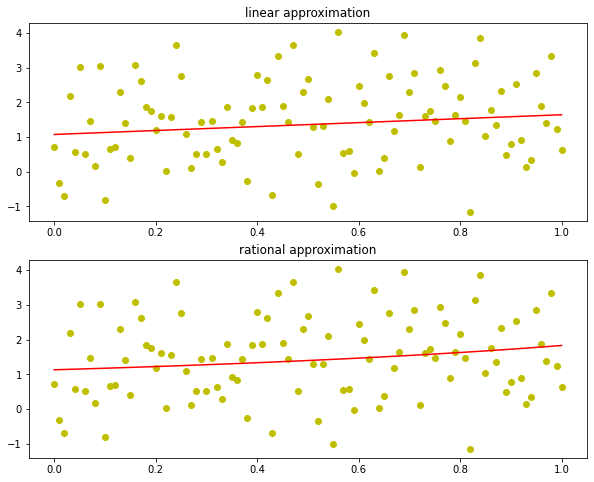

In [76]:
num_epochs = 100
lr = 0.01
eps = 0.001
func_types = ['linear', 'rational']

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, func in enumerate(func_types):
    print(f'Start training for {func}')
    w, b = train(xk, yk, num_epochs, lr, func)
    
    axs[i].scatter(xk, yk, c='y')
    if func == 'linear':
        GD_linear = [w, b]
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        GD_rat = [w, b]
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(' ')

Conjugate Gradient descent method of optimization

In [74]:
# create approximation functions
def linear(wb):
    w, b = wb
    return np.divide(np.sum((w * xk + b - yk) ** 2, axis=0), xk.shape[0])

def rational(wb):
    w, b = wb
    return np.divide(np.sum((w / (1 + b * xk) - yk) ** 2, axis=0), xk.shape[0])

Start training for <function linear at 0x7fd88c4274c0>
Optimization terminated successfully.
         Current function value: 1.371782
         Iterations: 10
         Function evaluations: 54
         Gradient evaluations: 18
Founded values: (0.5769422401542305, 1.183961032275336), real values: (0.8099335845105201, 0.5679920662479414)
 
Start training for <function rational at 0x7fd88c427550>
Optimization terminated successfully.
         Current function value: 1.375462
         Iterations: 8
         Function evaluations: 48
         Gradient evaluations: 16
Founded values: (1.249643138751914, -0.28738899586291566), real values: (0.8099335845105201, 0.5679920662479414)
 


/tmp/ipykernel_100657/122457342.py:8: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, [0.0, 0.0], method='CG', options={'xtol':1e-03, 'disp':True})
/tmp/ipykernel_100657/122457342.py:8: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, [0.0, 0.0], method='CG', options={'xtol':1e-03, 'disp':True})


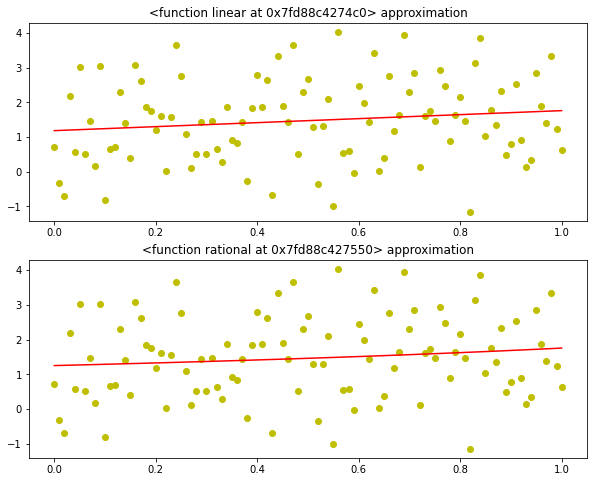

In [75]:
# types of approximation fuctions
func_types = [linear, rational]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, func in enumerate(func_types):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    CGD = minimize(func, [0.0, 0.0], method='CG', options={'xtol':1e-03, 'disp':True})
    w, b = CGD.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        CGD_linear = CGD.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        CGD_rat = CGD.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Newton’s method of optimization

In [83]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return np.divide(np.sum((w * xk + b - yk) ** 2, axis=0), xk.shape[0])

def d_linear(wb):
    w, b = wb
    return np.array([np.sum(2 * xk * (b + w * xk - yk)), np.sum(2 * (b + w * xk - yk))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * xk**2)
    hess[0,1] = np.sum(2 * xk)
    hess[1,0] = np.sum(2 * xk)
    hess[1,1] = (2)
    return hess

# for rational
def rational(wb):
    w, b = wb
    return np.divide(np.sum((w / (1 + b * xk) - yk) ** 2, axis=0), xk.shape[0])

def d_rational(wb):
    w, b = wb
    return np.divide(np.array([np.sum((w/(1+b*xk) - yk)*2/(1+b*xk)), np.sum(2*w*xk/(1+b*xk)**2 * (w/(1+b*xk)-yk))]), xk.shape[0])

def hess_rat(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,0] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,1] = np.sum(2 * w**2 * xk**2 / (1+b*xk)**4 * 4 * w * xk**2 * (w/(1+b*xk)-yk) / (1+b*xk)**3)
    return hess

Start training for <function linear at 0x7fd88c1ef820>
Optimization terminated successfully.
         Current function value: 1.371920
         Iterations: 17
         Function evaluations: 54
         Gradient evaluations: 54
         Hessian evaluations: 17
Founded values: (0.6135302472444409, 1.1705669570403114), real values: (0.8099335845105201, 0.5679920662479414)
 
Start training for <function rational at 0x7fd88c0d2820>
         Current function value: 1.409737
         Iterations: 0
         Function evaluations: 23
         Gradient evaluations: 11
         Hessian evaluations: 1
Founded values: (1.1, -0.5), real values: (0.8099335845105201, 0.5679920662479414)
 


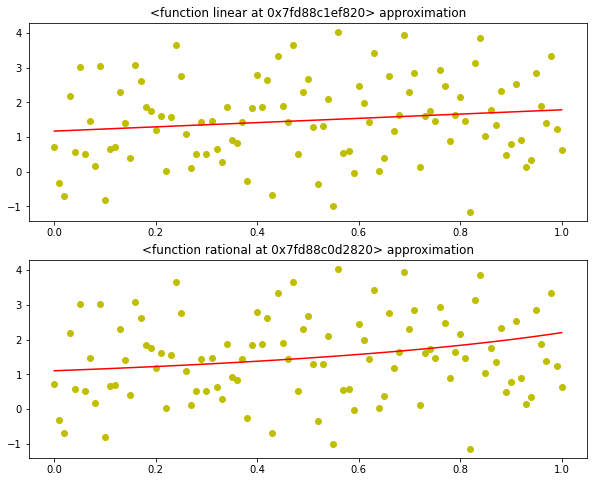

In [84]:
# types of approximation fuctions
func_types = [linear, rational]
jac_types = [d_linear, d_rational]
hess_types = [hess_lin, hess_rat]
start_values = [[0.0, 0.0], [1.1, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, jac, hess, start) in enumerate(zip(func_types, 
                                          jac_types, 
                                          hess_types,
                                          start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method
    newton = minimize(func, start, method='Newton-CG', jac=jac, hess=hess, options={'xtol': 1e-3, 'disp':True})
    w, b = newton.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        Newton_linear = newton.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        Newton_rat = newton.x
        axs[i].plot(xk, w / (1 + b * xk), 'r')
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Levenberg-Marquardt method of optimization

In [79]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return (w * xk + b - yk) ** 2

# for rational
def rational(wb):
    w, b = wb
    return (w / (1 + b * xk) - yk) ** 2

Start training for <function linear at 0x7fd88c00bd30>
Founded values: (0.4798277731424022, 1.2630681341189267), real values: (0.8099335845105201, 0.5679920662479414)
 
Start training for <function rational at 0x7fd88bfff820>
Founded values: (1.302098137900771, -0.25572786058014746), real values: (0.8099335845105201, 0.5679920662479414)
 


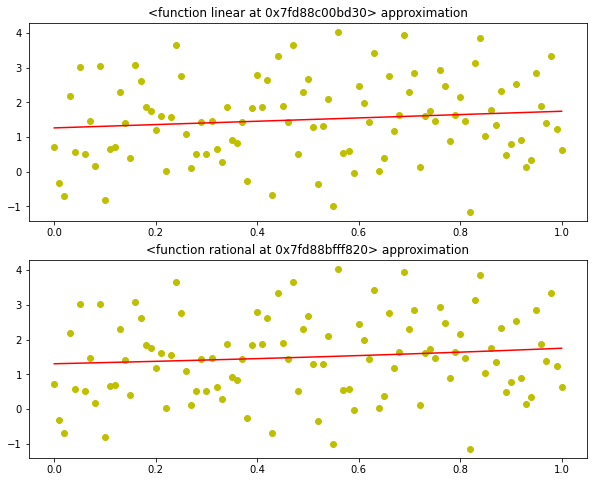

In [80]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1.0, 1.0], [1.0, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    lma = optimize.least_squares(func, start, method="lm", xtol=1e-3)
    w, b = lma.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        lma_linear = lma.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        lma_rat = lma.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Plot all linear results

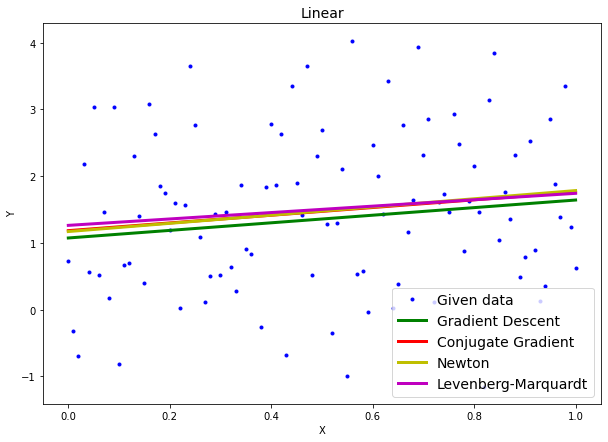

In [81]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Plot all rational results

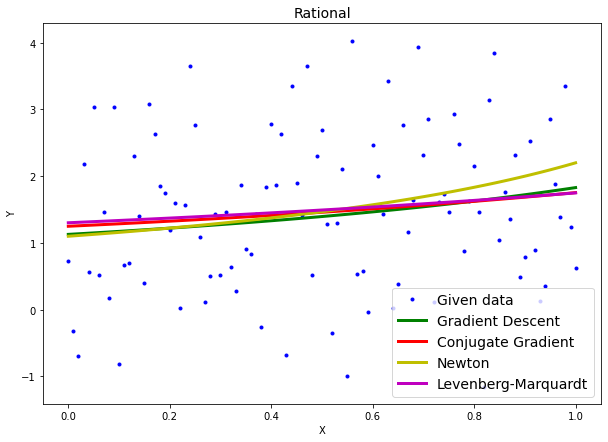

In [85]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)